# Popular Data Science Questions

The goal of this project is to use stack exchange website to determine popular topics in data science. We will query an online database utilizing SQL to pull the appropriate data to research this question. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#importing libraries

In [2]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

# importing the dataset and parsing the CreationDate column

### Exploring the Dataset

In [3]:
questions.head(5)

# exlporing the dataset

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
questions.info()

# reviewing the data tyes and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [5]:
questions["FavoriteCount"].unique()

# reviewing unique values in FavoriteCount

array([nan,  1.,  2.,  3.,  0., 11.,  4.,  5.,  7.,  6., 16.,  8.])

Cell types look good except for favoritecount.  Need to change nas to 0's and convert the column to an integer (currently a float for some reason).  Tags column has multiple categories separated by <> we could split into multiple columns but it might be a bad idea as like categories might be spread throughout multiple columns

In [6]:
questions["FavoriteCount"] = questions["FavoriteCount"].replace(np.nan, 0).astype(int)

# replacing the nan values as 0 and converting to an integer

In [7]:
questions["FavoriteCount"].unique()

# confirming update worked

array([ 0,  1,  2,  3, 11,  4,  5,  7,  6, 16,  8])

In [8]:
questions.info()

# confirming there are no more mull values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


### Data Cleaning

In [9]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")

# splitting tags into words separated by commas

In [10]:
questions.head(5)

#confirming tags updates

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


### Data Mining / Most Popular Tag Research

In [11]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
# loop to count the number of times a tag was mentioned

In [12]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")

# converting the count dictionary into a dataframe

In [13]:
tag_count.rename(columns={0: "Count"}, inplace=True)

# nenaming the count column and overwriting the DF

In [14]:
most_used = tag_count.sort_values("Count", ascending = False).head(10)

# sorting the results by descending and showing the top 10

In [15]:
most_used

# displays the DF created above

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


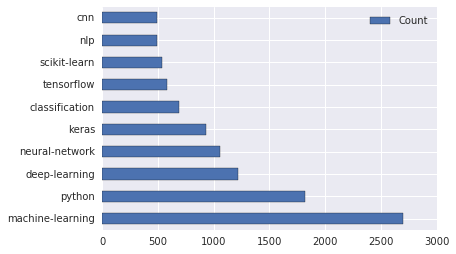

In [16]:
most_used.plot(kind="barh")

# bar chart to illustrate the data above

### Data Mining / Most Viewed Tags

In [17]:
fav_count = dict()
number = 0

for tags in questions["Tags"]:
    for tag in tags:
        if tag in fav_count:
            fav_count[tag] += questions["ViewCount"][number]
        else:
            fav_count[tag] = questions["ViewCount"][number]
    number +=1        
            
            
# creating a word count dictionary. Utilizing a for loop as each series element is a list in the Tags column

In [18]:
view_count = pd.DataFrame.from_dict(fav_count, orient="index")

# converting the dictionary to a DF

In [19]:
view_count.rename(columns={0: "Count"}, inplace=True)
most_viewed = view_count.sort_values("Count", ascending = False).head(10)
most_viewed

# updating column names, sorting and displaying

,Count
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


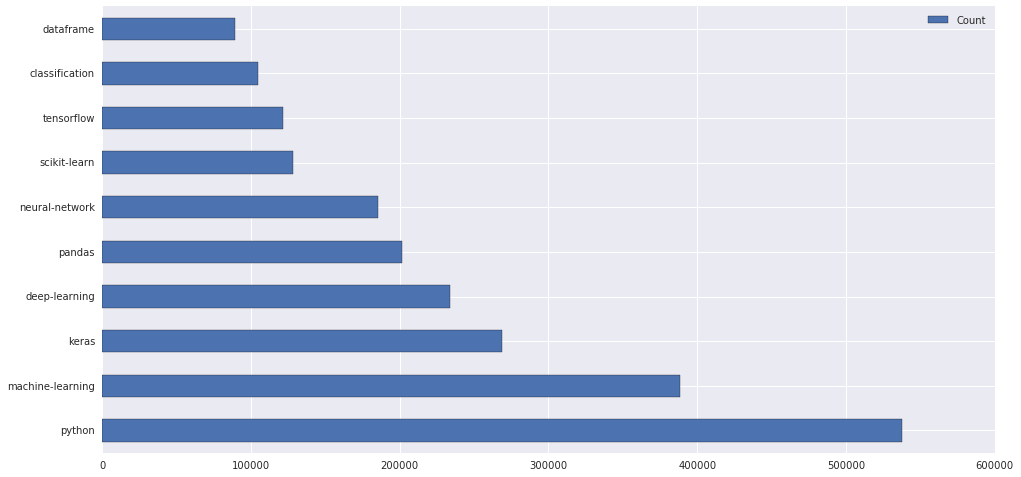

In [20]:
most_viewed.plot(kind="barh", figsize=(16,8))

# plotting the most viewed

In [21]:
# alternative way to calculate the data dictionary using iterrows()

tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(10)

### Data Mining / Deep Learning Popularity Research

In [22]:
def deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
        return 0
    
#function to determine if any tag is deep learning related

In [23]:
questions["is_deep"] = questions["Tags"].apply(deep_learning)

# applying function to the tags series

In [26]:
questions["year"] = questions["CreationDate"].dt.year

# creating a column for the year

In [27]:
questions["month"] = questions["CreationDate"].dt.month

# creating a column for the month

In [28]:
questions["monthyear"] = questions["month"] + questions["year"]*100

# creating a month and year column for grouping 

In [29]:
questions.head(5)

# confirming groupings appear accurate

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,is_deep,year,month,monthyear
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0,0,2019,1,201901
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0,0,2019,1,201901
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0,0,2019,1,201901
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0,0,2019,1,201901
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0,0,2019,1,201901


In [30]:
pivottable = pd.pivot_table(questions, values="is_deep", index="monthyear",
                     aggfunc=np.sum)

# Creating a pivot table to sum deep learning totals by month year

In [31]:
pivottable.reset_index(inplace=True)
pivottable = pivottable.rename(columns = {'index':'monthyear'})

# removing the monthyear as index and renaming

In [32]:
pivottable= pivottable[pivottable['is_deep'] != 0]

# removing all values that don't have deep learning tags

In [33]:
pivottable.head(5)

# reviewing aggregations

,monthyear,is_deep
0,201901,111
1,201902,148
2,201903,158
3,201904,158
4,201905,184


### Deep Learning Conclusions

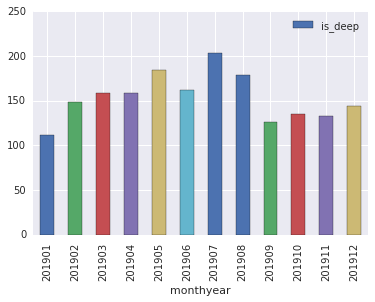

In [34]:
pivottable.plot.bar(x = "monthyear", y = "is_deep")

# plottinng the deep learning mentions by monthyear

Per the analysis above, it appears deep learning tags increased the first half of 2019 then had a slow decrease the second half of the year.  Can't necessarily conclude deep learning is becoming more popular